In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pythainlp
from gensim.models import KeyedVectors
from pythainlp.tokenize import word_tokenize
import dill as pickle
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('training_set.csv')
df

,PromotionId,description,bad
0,1NWLAzBwCUadj2dLNYVrTib3XuTL0T,ซาลาปัง จัดใหญ่แทนใจคนที่คุณรัก,0
1,1NWLD3dp7tdq34WkgzQGLiPQM7dFC5,ทะเลทะลัก!! สุดยอดบุฟเฟ่ต์ทะเล ที่คุณไม่ควรพลา...,0
2,1NWLCHgnVeBb2TIup13b1RSOLOl3Cq,บัตรสมาชิก By อ.กุ้งเผาโคราช\n\n\n\nบัตรสมาชิก...,1
3,1NWLC9rEila7y7EyYKPp17zCMkjHs2,สาวกเพื่อสุขภาพครับ,1
4,1NWLCUe1qEBZtZEwInmjdBoce8XBF2,วันเกิด แจ้งพนักงาน รับฟรีฮันนีโทส1จานค่ะ\n\n\n\n,0
...,...,...,...
2100,1NWL9v9ua9oLaFs779duFoI9ft0fga,อิ่มคุ้ม สบายกระเป๋า กับชุด Super Save จับคู่ ...,0
2101,1NWLBrPfc24ETTz9QzE8Ve51n6jigw,NaN,0
2102,1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE,หมูนุ่มน้ำมันงา นุ่มละมุน ละลายในปาก หอมน้ำมัน...,1
2103,1NWLCG2dgzDFbbPtmjzv4n1GyNgdnb,NaN,1


In [3]:
df.dtypes

PromotionId    object
description    object
bad             int64
dtype: object

In [4]:
df.isnull().sum()

PromotionId      0
description    570
bad              0
dtype: int64

In [5]:
df.shape

(2105, 3)

In [6]:
df.dropna(subset = ['description'] , inplace = True)
df.isnull().sum()

PromotionId    0
description    0
bad            0
dtype: int64

In [7]:
df.shape

(1535, 3)

In [9]:
list_0_1 = []
for i in df['bad']:
    if i == 0:
        list_0_1.append('No')
    else:
        list_0_1.append('Yes')
df['Spam or not'] = list_0_1
df

,PromotionId,description,bad,Spam or not
0,1NWLAzBwCUadj2dLNYVrTib3XuTL0T,ซาลาปัง จัดใหญ่แทนใจคนที่คุณรัก,0,No
1,1NWLD3dp7tdq34WkgzQGLiPQM7dFC5,ทะเลทะลัก!! สุดยอดบุฟเฟ่ต์ทะเล ที่คุณไม่ควรพลา...,0,No
2,1NWLCHgnVeBb2TIup13b1RSOLOl3Cq,บัตรสมาชิก By อ.กุ้งเผาโคราช\n\n\n\nบัตรสมาชิก...,1,Yes
3,1NWLC9rEila7y7EyYKPp17zCMkjHs2,สาวกเพื่อสุขภาพครับ,1,Yes
4,1NWLCUe1qEBZtZEwInmjdBoce8XBF2,วันเกิด แจ้งพนักงาน รับฟรีฮันนีโทส1จานค่ะ\n\n\n\n,0,No
...,...,...,...,...
2098,1NWLAvgSKGWWZhILvYEZFMqVOvguRO,Hmmmmmmm,1,Yes
2099,1NWLBEniPtL93NmkjkudRZqI1AYlPD,โก้โก้\n\n\n,1,Yes
2100,1NWL9v9ua9oLaFs779duFoI9ft0fga,อิ่มคุ้ม สบายกระเป๋า กับชุด Super Save จับคู่ ...,0,No
2102,1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE,หมูนุ่มน้ำมันงา นุ่มละมุน ละลายในปาก หอมน้ำมัน...,1,Yes


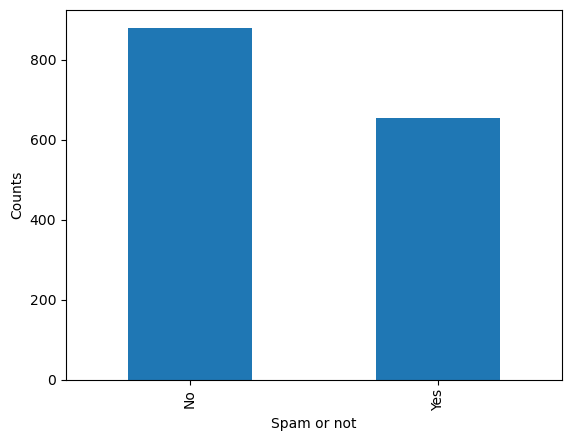

In [10]:
df['Spam or not'].value_counts().plot.bar()
plt.ylabel('Counts')
plt.xlabel('Spam or not')
plt.show()

In [11]:
df['Spam or not'].value_counts()

No     880
Yes    655
Name: Spam or not, dtype: int64

In [13]:
from pythainlp import word_vector
model_path = 'thwiki_data/models/'
model = KeyedVectors.load_word2vec_format(f'{model_path}thai2vec.bin',binary=True)
model = word_vector.get_model()

In [14]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

In [15]:
thai2dict = {}
for word in model.index_to_key:
    thai2dict[word] = model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ที่,0.308956,-0.097699,0.116745,0.215612,0.015768,-0.064163,0.062168,0.039649,0.864940,0.846904,...,-0.142418,0.033241,0.171581,-0.624864,-0.009358,0.449131,0.120130,-0.122195,-0.450617,-0.071318
และ,0.010751,-0.618971,0.129665,0.035460,-0.007560,0.027607,0.397824,0.026543,0.254075,0.168328,...,-0.105786,0.180930,-0.101630,0.070885,-0.037263,0.183606,-0.049088,-0.672288,-1.293044,0.592576
เป็น,-0.015736,-0.258926,0.052953,0.153728,-0.005985,-0.021081,0.041088,0.057312,1.633230,0.442729,...,-0.009408,-0.252576,-0.305512,0.372542,0.049151,0.568470,0.266586,0.400800,-0.784650,0.197369
ของ,-0.189711,-0.174774,0.171124,-0.186771,0.054294,-0.114150,-1.109456,-0.094466,-0.447015,0.042377,...,-0.168676,-0.148738,0.680404,0.097702,0.020270,0.182967,-0.083949,0.006287,-0.707434,-0.070234
มี,-0.156962,-0.231863,0.080312,0.323157,0.215695,0.055145,0.420794,0.016842,0.256759,0.832864,...,-0.044267,-0.147186,-0.105424,0.907078,0.009299,0.550953,0.139337,0.031696,-0.670379,-0.008048
ได้,-0.428813,-0.031194,0.041922,-0.036608,-0.008106,0.076470,-0.782270,0.033361,0.606864,0.440520,...,0.024458,-0.025031,0.103389,-0.078255,0.034323,0.459774,-0.748643,0.337775,-0.487408,-0.511535
"""""""""",-0.287710,0.064193,0.205076,0.146356,-0.071343,-0.039451,-1.845461,0.163763,1.018096,0.272786,...,0.051024,-0.532856,-0.131856,-0.090323,-0.058895,0.151262,-0.420358,0.055971,-0.930814,0.163908
การ,0.239587,-0.303620,0.079953,-0.453045,-0.528826,-0.161692,0.235725,-0.099673,0.691668,0.536159,...,-0.110436,-0.297495,-0.217414,0.045158,0.066647,0.190095,-0.304333,-0.724927,-0.995488,-0.716609
(,-0.120522,-0.355783,0.168180,-0.377733,-0.158624,-0.047249,0.361140,0.161460,0.913314,0.345037,...,0.116285,-0.318218,-0.356664,0.519889,0.130475,0.125772,0.101328,-0.382658,-1.205359,0.340139
),-0.086848,-0.155231,0.133015,-0.039913,0.183761,0.115142,-1.940854,-0.066565,-2.399744,0.146722,...,0.019406,-0.181474,0.099863,0.516092,0.201697,0.249139,0.252957,1.138815,-0.018209,0.232265


In [16]:
labels = model.index_to_key
# tsne = TSNE(n_components=2, init='pca', n_iter=1000)
# thai2plot = tsne.fit_transform(thai2vec)
# pickle.dump(thai2plot,open(f'{model_path}thai2plot.pkl','wb'))
thai2plot = pickle.load(open(f'{model_path}thai2plot.pkl','rb'))

In [17]:
W = None

for v, i in zip(labels, range(len(labels))):
    if i % 5000 == 0:
        print(f'word processing... {i}')
    w = thai2dict[v]
    if W is None:
        W = w
    else:
        W = np.vstack((W, w))

word processing... 0
word processing... 5000
word processing... 10000
word processing... 15000
word processing... 20000
word processing... 25000
word processing... 30000
word processing... 35000
word processing... 40000
word processing... 45000
word processing... 50000


In [18]:
print(W.shape)

(51358, 300)


In [19]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['description'].apply(text_process)
df

,PromotionId,description,bad,Spam or not,text_tokens
0,1NWLAzBwCUadj2dLNYVrTib3XuTL0T,ซาลาปัง จัดใหญ่แทนใจคนที่คุณรัก,0,No,ซา ลา ปัง จัด ใหญ่ แทน ใจ คน ที่ คุณ รัก
1,1NWLD3dp7tdq34WkgzQGLiPQM7dFC5,ทะเลทะลัก!! สุดยอดบุฟเฟ่ต์ทะเล ที่คุณไม่ควรพลา...,0,No,ทะเล ทะลัก สุดยอด บุฟเฟ่ต์ ทะเล ที่ คุณ ไม่ คว...
2,1NWLCHgnVeBb2TIup13b1RSOLOl3Cq,บัตรสมาชิก By อ.กุ้งเผาโคราช\n\n\n\nบัตรสมาชิก...,1,Yes,บัตรสมาชิก By อ กุ้ง เผา โคราช บัตรสมาชิก จำหน...
3,1NWLC9rEila7y7EyYKPp17zCMkjHs2,สาวกเพื่อสุขภาพครับ,1,Yes,สาวก เพื่อ สุขภาพ ครับ
4,1NWLCUe1qEBZtZEwInmjdBoce8XBF2,วันเกิด แจ้งพนักงาน รับฟรีฮันนีโทส1จานค่ะ\n\n\n\n,0,No,วันเกิด แจ้ง พนักงาน รับ ฟรี ฮันนี โทส 1 จาน ค่ะ
...,...,...,...,...,...
2098,1NWLAvgSKGWWZhILvYEZFMqVOvguRO,Hmmmmmmm,1,Yes,Hmmmmmmm
2099,1NWLBEniPtL93NmkjkudRZqI1AYlPD,โก้โก้\n\n\n,1,Yes,โก้ โก้
2100,1NWL9v9ua9oLaFs779duFoI9ft0fga,อิ่มคุ้ม สบายกระเป๋า กับชุด Super Save จับคู่ ...,0,No,อิ่ม คุ้ม สบาย กระเป๋า กับ ชุด Super Save จับค...
2102,1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE,หมูนุ่มน้ำมันงา นุ่มละมุน ละลายในปาก หอมน้ำมัน...,1,Yes,หมู นุ่ม น้ำมันงา นุ่ม ละมุน ละลาย ใน ปาก หอม ...


<Figure size 640x480 with 0 Axes>

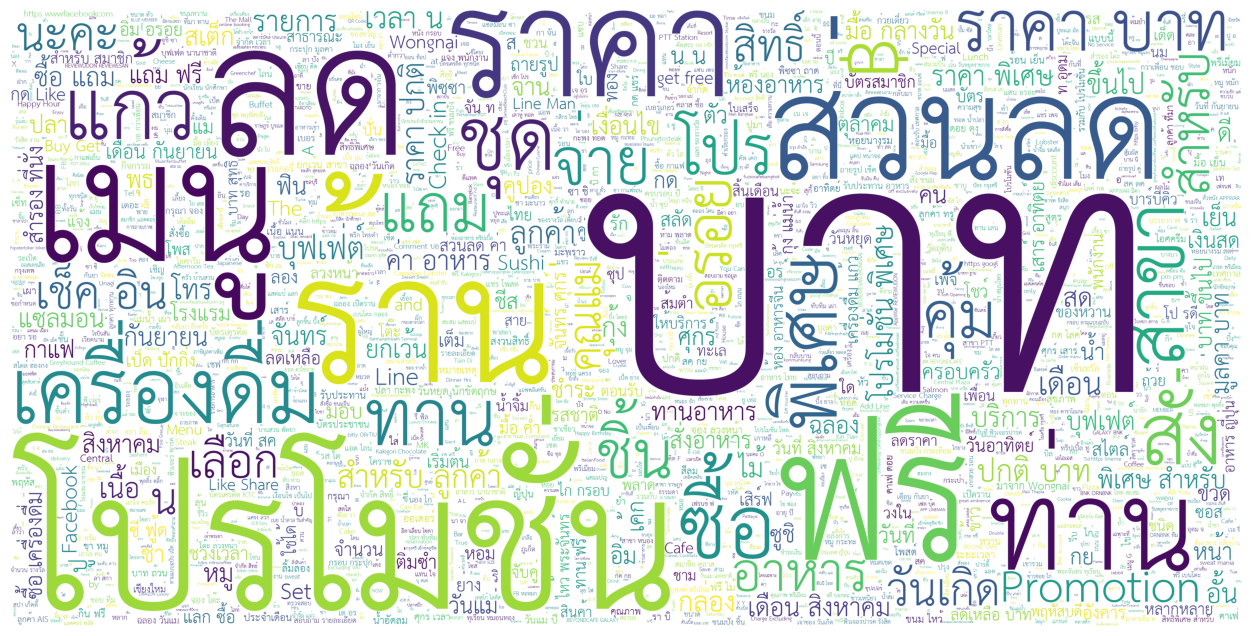

In [22]:
## No spam
from wordcloud import WordCloud, STOPWORDS
df_no = df[df['Spam or not'] == 'No']
no_word_all = " ".join(text for text in df_no['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', 
                      max_words=2000, 
                      height = 2000, 
                      width=4000, 
                      font_path=fp, 
                      regexp=reg).generate(no_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("No spam.png")
plt.show()


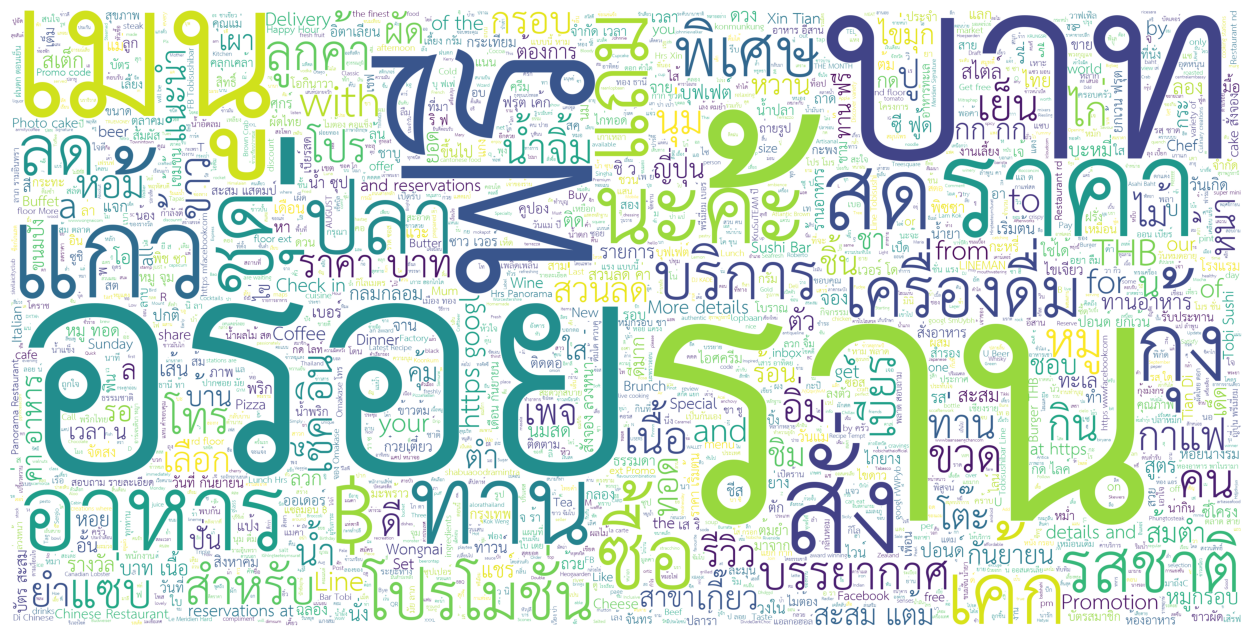

In [23]:
## Spam
df_yes = df[df['Spam or not'] == 'Yes']
yes_word_all = " ".join(text for text in df_yes['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white',
                      max_words=2000, 
                      height = 2000, 
                      width=4000, 
                      font_path=fp, regexp=reg).generate(yes_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("Spam.png")
plt.show()

In [24]:
df = df.reset_index()

In [25]:
tx_list = []
for i in range(len(df['text_tokens'])):
    tx_list.append([x.strip() for x in df['text_tokens'][i].split(' ')])

In [27]:
df['text_tokens_list'] =  tx_list
df.head()

,index,PromotionId,description,bad,Spam or not,text_tokens,text_tokens_list
0,0,1NWLAzBwCUadj2dLNYVrTib3XuTL0T,ซาลาปัง จัดใหญ่แทนใจคนที่คุณรัก,0,No,ซา ลา ปัง จัด ใหญ่ แทน ใจ คน ที่ คุณ รัก,"[ซา, ลา, ปัง, จัด, ใหญ่, แทน, ใจ, คน, ที่, คุณ..."
1,1,1NWLD3dp7tdq34WkgzQGLiPQM7dFC5,ทะเลทะลัก!! สุดยอดบุฟเฟ่ต์ทะเล ที่คุณไม่ควรพลา...,0,No,ทะเล ทะลัก สุดยอด บุฟเฟ่ต์ ทะเล ที่ คุณ ไม่ คว...,"[ทะเล, ทะลัก, สุดยอด, บุฟเฟ่ต์, ทะเล, ที่, คุณ..."
2,2,1NWLCHgnVeBb2TIup13b1RSOLOl3Cq,บัตรสมาชิก By อ.กุ้งเผาโคราช\n\n\n\nบัตรสมาชิก...,1,Yes,บัตรสมาชิก By อ กุ้ง เผา โคราช บัตรสมาชิก จำหน...,"[บัตรสมาชิก, By, อ, กุ้ง, เผา, โคราช, บัตรสมาช..."
3,3,1NWLC9rEila7y7EyYKPp17zCMkjHs2,สาวกเพื่อสุขภาพครับ,1,Yes,สาวก เพื่อ สุขภาพ ครับ,"[สาวก, เพื่อ, สุขภาพ, ครับ]"
4,4,1NWLCUe1qEBZtZEwInmjdBoce8XBF2,วันเกิด แจ้งพนักงาน รับฟรีฮันนีโทส1จานค่ะ\n\n\n\n,0,No,วันเกิด แจ้ง พนักงาน รับ ฟรี ฮันนี โทส 1 จาน ค่ะ,"[วันเกิด, แจ้ง, พนักงาน, รับ, ฟรี, ฮันนี, โทส,..."


In [30]:
#df_notnull_0 = df_notnull[df_notnull['bad'] == 0 ].reset_index()
df_notnull_0 = df.reset_index()

In [31]:
fix_list = []
for j in  range(len(df_notnull_0['text_tokens_list'])):
    matches = []
    c=0
    for match in labels:        
        for i in df_notnull_0['text_tokens_list'][j]:
            if i == match:
                #print(i,match,c)
                matches.append(c)
        c+=1
    fix_list.append(matches)

In [32]:
thaiplot_list = []
for i in fix_list:
    thaiplot_list.append(thai2plot[i])

In [33]:
txtedit_list = []
for i in fix_list:
    txt_list = []
    for j in i:
        txt_list.append(labels[j])
    txtedit_list.append(txt_list)

In [34]:
df_notnull_0['thaiplot_list'] = thaiplot_list
df_notnull_0['txtedit_list'] = txtedit_list
df_notnull_0['index_list'] = fix_list
df_notnull_0.head()

,level_0,index,PromotionId,description,bad,Spam or not,text_tokens,text_tokens_list,thaiplot_list,txtedit_list,index_list
0,0,0,1NWLAzBwCUadj2dLNYVrTib3XuTL0T,ซาลาปัง จัดใหญ่แทนใจคนที่คุณรัก,0,No,ซา ลา ปัง จัด ใหญ่ แทน ใจ คน ที่ คุณ รัก,"[ซา, ลา, ปัง, จัด, ใหญ่, แทน, ใจ, คน, ที่, คุณ...","[[31.951164, 22.75914], [36.351154, 19.510252]...","[ที่, คน, จัด, ซา, ลา, ใหญ่, แทน, รัก, คุณ, ใจ...","[0, 42, 139, 181, 182, 192, 364, 426, 864, 131..."
1,1,1,1NWLD3dp7tdq34WkgzQGLiPQM7dFC5,ทะเลทะลัก!! สุดยอดบุฟเฟ่ต์ทะเล ที่คุณไม่ควรพลา...,0,No,ทะเล ทะลัก สุดยอด บุฟเฟ่ต์ ทะเล ที่ คุณ ไม่ คว...,"[ทะเล, ทะลัก, สุดยอด, บุฟเฟ่ต์, ทะเล, ที่, คุณ...","[[31.951164, 22.75914], [35.25994, 33.6678], [...","[ที่, และ, น, จาก, -, นี้, ไม่, ไม่, อีก, %, %...","[0, 1, 12, 17, 26, 35, 47, 47, 89, 112, 112, 1..."
2,2,2,1NWLCHgnVeBb2TIup13b1RSOLOl3Cq,บัตรสมาชิก By อ.กุ้งเผาโคราช\n\n\n\nบัตรสมาชิก...,1,Yes,บัตรสมาชิก By อ กุ้ง เผา โคราช บัตรสมาชิก จำหน...,"[บัตรสมาชิก, By, อ, กุ้ง, เผา, โคราช, บัตรสมาช...","[[31.951164, 22.75914], [35.25994, 33.6678], [...","[ที่, และ, และ, เป็น, มี, ได้, การ, (, ), ), จ...","[0, 1, 1, 2, 4, 5, 7, 8, 9, 9, 14, 15, 17, 25,..."
3,3,3,1NWLC9rEila7y7EyYKPp17zCMkjHs2,สาวกเพื่อสุขภาพครับ,1,Yes,สาวก เพื่อ สุขภาพ ครับ,"[สาวก, เพื่อ, สุขภาพ, ครับ]","[[34.237007, 33.977566], [6.5886483, 9.671809]...","[เพื่อ, สุขภาพ, สาวก, ครับ]","[49, 1536, 5104, 7412]"
4,4,4,1NWLCUe1qEBZtZEwInmjdBoce8XBF2,วันเกิด แจ้งพนักงาน รับฟรีฮันนีโทส1จานค่ะ\n\n\n\n,0,No,วันเกิด แจ้ง พนักงาน รับ ฟรี ฮันนี โทส 1 จาน ค่ะ,"[วันเกิด, แจ้ง, พนักงาน, รับ, ฟรี, ฮันนี, โทส,...","[[53.9429, -16.522245], [14.482227, 22.725996]...","[1, รับ, ฟรี, แจ้ง, พนักงาน, จาน, วันเกิด, ค่ะ]","[58, 289, 1476, 1806, 2670, 3172, 5322, 13585]"


In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_notnull_0, test_size=0.2)

In [36]:
#Data length adjustment for neural network
Xtrain_idx = []
max_len = 0

for x, i in zip(train['index_list'], range(len(train['index_list']))):
    if i % 100 == 0:
        print(f'heading process... {i}')
    Xtrain_idx.append(x)
    if len(Xtrain_idx[-1]) > max_len:
        max_len = len(Xtrain_idx[-1])
print(max_len)

heading process... 0
heading process... 100
heading process... 200
heading process... 300
heading process... 400
heading process... 500
heading process... 600
heading process... 700
heading process... 800
heading process... 900
heading process... 1000
heading process... 1100
heading process... 1200
253


In [37]:
#Zero padding with randow for word vector
W = np.vstack((np.random.rand(*W[0].shape), W))
print(W.shape)

(51359, 300)


In [38]:
len(Xtrain_idx)

1228

In [39]:
#Zero padding for training data
for i, x in zip(range(len(Xtrain_idx)), Xtrain_idx):
    if i % 100 == 0:
        print(f'padding process... {i}')
    if len(x) < max_len:
        Xtrain_idx[i] = np.hstack((x, np.zeros(max_len - len(x))))

#Convert to numpy array for neural network
Xtrain_idx = np.array(Xtrain_idx)

padding process... 0
padding process... 100
padding process... 200
padding process... 300
padding process... 400
padding process... 500
padding process... 600
padding process... 700
padding process... 800
padding process... 900
padding process... 1000
padding process... 1100
padding process... 1200


In [40]:
#Data length adjustment for neural network
Xtest_idx = []
max_len_test = 0

for x, i in zip(test['index_list'], range(len(test['index_list']))):
    if i % 100 == 0:
        print(f'heading process... {i}')
    Xtest_idx.append(x)
    if len(Xtest_idx[-1]) > max_len_test:
        max_len_test = len(Xtest_idx[-1])
print(max_len_test)

heading process... 0
heading process... 100
heading process... 200
heading process... 300
171


In [41]:
#Zero padding for test data
for i, x in zip(range(len(Xtest_idx)), Xtest_idx):
    if i % 100 == 0:
        print(f'padding process... {i}')
    if len(x) < max_len_test:
        Xtest_idx[i] = np.hstack((x, np.zeros(max_len_test - len(x))))

#Convert to numpy array for neural network
Xtest_idx = np.array(Xtest_idx)

padding process... 0
padding process... 100
padding process... 200
padding process... 300


In [42]:
#Import neural networks libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
print(tf.__version__)

2.7.0


In [43]:
#Design the Long Short Term Memory (LSTM) Neural Networks
model = Sequential()

#Layer 1: Embedding layer
model.add(Embedding(W.shape[0], W.shape[1], name = 'embed_layer'))

#Layer 2: LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Dropout(0.2))

#Layer 3: LSTM layer
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))

#Layer 4: Dense layer (Hidden layer)
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.1))

#Layer 5: Output layer
model.add(Dense(2, activation = 'sigmoid')) #Five categories (0-4) answer for news

#Defining the optimizer
optz = tf.keras.optimizers.Adam(lr = 0.001)

#Complie the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optz, metrics = ['accuracy'])

#Model overview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed_layer (Embedding)     (None, None, 300)         15407700  
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        186880    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 24)                1

C:\Users\User\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
model.get_layer('embed_layer').set_weights([W])
model.get_layer('embed_layer').trainable = True

In [45]:
logs = model.fit(Xtrain_idx, np.array(train['bad']), epochs = 30,  batch_size = 32, validation_split = 0.2)

Epoch 1/30
31/31 [==============================] - 22s 539ms/step - loss: 0.6159 - accuracy: 0.6904 - val_loss: 0.5684 - val_accuracy: 0.7195
Epoch 2/30
31/31 [==============================] - 14s 465ms/step - loss: 0.5334 - accuracy: 0.7495 - val_loss: 0.5375 - val_accuracy: 0.7561
Epoch 3/30
31/31 [==============================] - 14s 461ms/step - loss: 0.4478 - accuracy: 0.8198 - val_loss: 0.4855 - val_accuracy: 0.7724
Epoch 4/30
31/31 [==============================] - 14s 463ms/step - loss: 0.3312 - accuracy: 0.8768 - val_loss: 0.4866 - val_accuracy: 0.8089
Epoch 5/30
31/31 [==============================] - 14s 457ms/step - loss: 0.2204 - accuracy: 0.9236 - val_loss: 0.5429 - val_accuracy: 0.8252
Epoch 6/30
31/31 [==============================] - 14s 461ms/step - loss: 0.1878 - accuracy: 0.9318 - val_loss: 0.5412 - val_accuracy: 0.8374
Epoch 7/30
31/31 [==============================] - 14s 459ms/step - loss: 0.1291 - accuracy: 0.9542 - val_loss: 0.6014 - val_accuracy: 0.8171

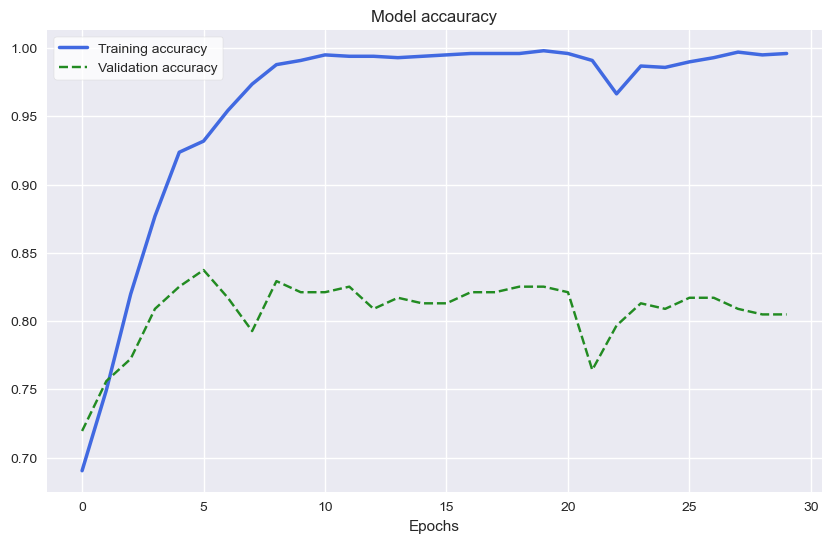

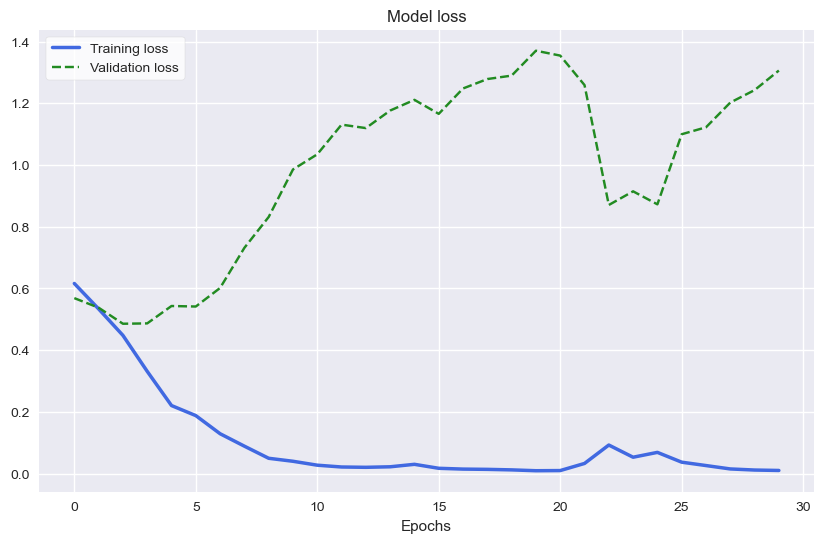

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

#%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
    plt.title('Model accauracy')
    plt.xlabel('Epochs')
    plt.plot(logs.history['accuracy'], c = 'royalblue', linewidth = 2.5, label = 'Training accuracy')
    plt.plot(logs.history['val_accuracy'], c = 'forestgreen', linestyle = '--', label = 'Validation accuracy')
    plt.legend(frameon = True, facecolor = 'white')
    plt.savefig("Graph1.png")
    plt.show()

plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
    plt.title('Model loss')
    plt.xlabel('Epochs')
    plt.plot(logs.history['loss'], c = 'royalblue', linewidth = 2.5, label = 'Training loss')
    plt.plot(logs.history['val_loss'], c = 'forestgreen', linestyle = '--', label = 'Validation loss')
    plt.legend(frameon = True, facecolor = 'white')
    plt.savefig("Graph2.png")
    plt.show()

In [47]:
len(Xtest_idx)

307

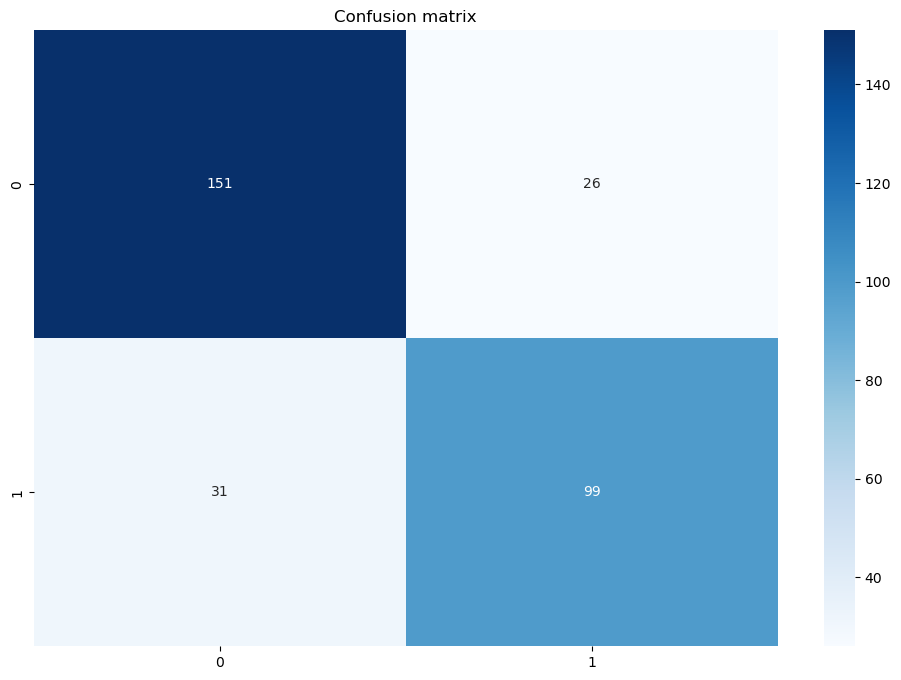

In [48]:
from sklearn.metrics import confusion_matrix

pred = model.predict(Xtest_idx).argmax(axis = 1)
cf_matrix = confusion_matrix(np.array(test['bad']), pred)

#Plot confusion matrix
plt.figure(figsize = (12,8))
plt.title('Confusion matrix')
sns.heatmap(cf_matrix, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.savefig("Confusion matrix.png")
plt.show()

In [49]:
from sklearn.metrics import classification_report

In [50]:
matrix = classification_report(np.array(test['bad']),pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.76      0.78       130
           0       0.83      0.85      0.84       177

    accuracy                           0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



In [51]:
df_test = pd.read_csv('testing_set.csv')
df_test

,PromotionId,description
0,1NWLA8yFGO4oZeRpAvdAY1JDJb6UtA,โปรโมชั่นพิเศษสำหรับ นักเรียน นักศึกษา เพียง แ...
1,1NWLAsDec3ZqmKAKk8cOgDmg5dVwuQ,ส่วนลด 10 บาททันที สำหรับลูกค้าในการซื้อแก้วแรก
2,1NWLAA6FbijUl5mqQ0Z2VTetfFlmRX,NaN
3,1NWLCX8ML1e2c5pkgf8oT1AVfAsFio,LINEMAN บริการส่งเค้กถึงมือท่าน
4,1NWLC0j3XRIwoXpTNXFkZVah0bnasd,2 วันสุดท้ายของเดือนนี้\n\n\n30-31 สค 61
...,...,...
522,1NWLAjKUD2KjE4ZPVBtVxEQSl2wOWT,NaN
523,1NWLClAr0URjYKCGkrdMrdp7DKKPux,หากลูกค้ามารออาหารนานเกินไปหรือมาสั่งอาหารทานก...
524,1NWLBVtA5KYJ6AFZGQNNSZidnUzbfr,📣📣โปรโมชั่นวันแม่ปีนี้🎉🎉\n\n\n\nThe Park Coffe...
525,1NWLB36bUGWJEuQCMQX8XPSFKtyFxP,เมนูเนื้อริบอายวากิว A4 ลด 25% ทุกเมนู \n\n\n\...


In [52]:
df_test_notnull = df_test[df_test['description'].notnull()]
df_test_notnull['text_tokens'] = df_test_notnull['description'].apply(text_process)
df_test_notnull

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PromotionId,description,text_tokens
0,1NWLA8yFGO4oZeRpAvdAY1JDJb6UtA,โปรโมชั่นพิเศษสำหรับ นักเรียน นักศึกษา เพียง แ...,โปรโมชั่น พิเศษ สำหรับ นักเรียน นักศึกษา เพียง...
1,1NWLAsDec3ZqmKAKk8cOgDmg5dVwuQ,ส่วนลด 10 บาททันที สำหรับลูกค้าในการซื้อแก้วแรก,ส่วนลด 10 บาท ทันที สำหรับ ลูกค้า ใน การ ซื้อ ...
3,1NWLCX8ML1e2c5pkgf8oT1AVfAsFio,LINEMAN บริการส่งเค้กถึงมือท่าน,LINEMAN บริการ ส่ง เค้ก ถึง มือ ท่าน
4,1NWLC0j3XRIwoXpTNXFkZVah0bnasd,2 วันสุดท้ายของเดือนนี้\n\n\n30-31 สค 61,2 วันสุดท้าย ของ เดือน นี้ 30 - 31 สค 61
5,1NWLC7kLnFM4yOQYB03dlTzOD7mpfS,. Thousand Island Trio (เทาส์ซันไอแลนด์ทรี-โอ).,Thousand Island Trio ( เทา ส์ ซัน ไอ แลนด์ ท ร...
...,...,...,...
521,1NWLCFj3nL8Wkr0DSuq19pYCQNQwxu,🤩อังคาร สังขยาเดย์🤩.\n\n\n\n\n\n\n\nย้ำ ทุกวัน...,🤩 อังคาร สังขยา เดย์ 🤩 ย้ำ ทุกวัน อังคาร ตลอด ...
523,1NWLClAr0URjYKCGkrdMrdp7DKKPux,หากลูกค้ามารออาหารนานเกินไปหรือมาสั่งอาหารทานก...,หาก ลูกค้า มา รอ อาหาร นาน เกินไป หรือ มา สั่ง...
524,1NWLBVtA5KYJ6AFZGQNNSZidnUzbfr,📣📣โปรโมชั่นวันแม่ปีนี้🎉🎉\n\n\n\nThe Park Coffe...,📣📣 โปรโมชั่น วันแม่ ปี นี้ 🎉🎉 The Park Coffee ...
525,1NWLB36bUGWJEuQCMQX8XPSFKtyFxP,เมนูเนื้อริบอายวากิว A4 ลด 25% ทุกเมนู \n\n\n\...,เมนู เนื้อ ริบ อา ยวา กิว A 4 ลด 25 % ทุก เมนู...


In [53]:
df_test_notnull = df_test_notnull.reset_index()

In [54]:
tx_list = []
for i in range(len(df_test_notnull['text_tokens'])):
    tx_list.append([x.strip() for x in df_test_notnull['text_tokens'][i].split(' ')])

In [55]:
df_test_notnull['text_tokens_list'] =  tx_list

In [56]:
df_test_notnull_0 = df_test_notnull.reset_index()
fix_list = []
for j in  range(len(df_test_notnull_0['text_tokens_list'])):
    matches = []
    c=0
    for match in labels:        
        for i in df_test_notnull_0['text_tokens_list'][j]:
            if i == match:
                #print(i,match,c)
                matches.append(c)
        c+=1
    fix_list.append(matches)

In [57]:
thaiplot_list = []
for i in fix_list:
    thaiplot_list.append(thai2plot[i])

In [58]:
txtedit_list = []
for i in fix_list:
    txt_list = []
    for j in i:
        txt_list.append(labels[j])
    txtedit_list.append(txt_list)

In [59]:
df_test_notnull_0['index_list'] = fix_list

In [60]:
df_test_notnull_0

,level_0,index,PromotionId,description,text_tokens,text_tokens_list,index_list
0,0,0,1NWLA8yFGO4oZeRpAvdAY1JDJb6UtA,โปรโมชั่นพิเศษสำหรับ นักเรียน นักศึกษา เพียง แ...,โปรโมชั่น พิเศษ สำหรับ นักเรียน นักศึกษา เพียง...,"[โปรโมชั่น, พิเศษ, สำหรับ, นักเรียน, นักศึกษา,...","[111, 112, 215, 259, 289, 487, 533, 620, 1107,..."
1,1,1,1NWLAsDec3ZqmKAKk8cOgDmg5dVwuQ,ส่วนลด 10 บาททันที สำหรับลูกค้าในการซื้อแก้วแรก,ส่วนลด 10 บาท ทันที สำหรับ ลูกค้า ใน การ ซื้อ ...,"[ส่วนลด, 10, บาท, ทันที, สำหรับ, ลูกค้า, ใน, ก...","[7, 106, 111, 244, 348, 744, 1140, 1659, 3102,..."
2,2,3,1NWLCX8ML1e2c5pkgf8oT1AVfAsFio,LINEMAN บริการส่งเค้กถึงมือท่าน,LINEMAN บริการ ส่ง เค้ก ถึง มือ ท่าน,"[LINEMAN, บริการ, ส่ง, เค้ก, ถึง, มือ, ท่าน]","[71, 281, 301, 1048, 1065, 6423]"
3,3,4,1NWLC0j3XRIwoXpTNXFkZVah0bnasd,2 วันสุดท้ายของเดือนนี้\n\n\n30-31 สค 61,2 วันสุดท้าย ของ เดือน นี้ 30 - 31 สค 61,"[2, วันสุดท้าย, ของ, เดือน, นี้, 30, -, 31, สค...","[3, 26, 35, 55, 133, 487, 1172, 5827, 8647]"
4,4,5,1NWLC7kLnFM4yOQYB03dlTzOD7mpfS,. Thousand Island Trio (เทาส์ซันไอแลนด์ทรี-โอ).,Thousand Island Trio ( เทา ส์ ซัน ไอ แลนด์ ท ร...,"[Thousand, Island, Trio, (, เทา, ส์, ซัน, ไอ, ...","[8, 9, 26, 62, 114, 135, 451, 1308, 1426, 4411]"
...,...,...,...,...,...,...,...
363,363,521,1NWLCFj3nL8Wkr0DSuq19pYCQNQwxu,🤩อังคาร สังขยาเดย์🤩.\n\n\n\n\n\n\n\nย้ำ ทุกวัน...,🤩 อังคาร สังขยา เดย์ 🤩 ย้ำ ทุกวัน อังคาร ตลอด ...,"[🤩, อังคาร, สังขยา, เดย์, 🤩, ย้ำ, ทุกวัน, อังค...","[1, 8, 9, 32, 49, 133, 147, 346, 348, 392, 926..."
364,364,523,1NWLClAr0URjYKCGkrdMrdp7DKKPux,หากลูกค้ามารออาหารนานเกินไปหรือมาสั่งอาหารทานก...,หาก ลูกค้า มา รอ อาหาร นาน เกินไป หรือ มา สั่ง...,"[หาก, ลูกค้า, มา, รอ, อาหาร, นาน, เกินไป, หรือ...","[1, 3, 4, 8, 9, 13, 20, 28, 28, 30, 43, 52, 87..."
365,365,524,1NWLBVtA5KYJ6AFZGQNNSZidnUzbfr,📣📣โปรโมชั่นวันแม่ปีนี้🎉🎉\n\n\n\nThe Park Coffe...,📣📣 โปรโมชั่น วันแม่ ปี นี้ 🎉🎉 The Park Coffee ...,"[📣📣, โปรโมชั่น, วันแม่, ปี, นี้, 🎉🎉, The, Park...","[0, 15, 26, 35, 45, 58, 58, 93, 95, 99, 186, 2..."
366,366,525,1NWLB36bUGWJEuQCMQX8XPSFKtyFxP,เมนูเนื้อริบอายวากิว A4 ลด 25% ทุกเมนู \n\n\n\...,เมนู เนื้อ ริบ อา ยวา กิว A 4 ลด 25 % ทุก เมนู...,"[เมนู, เนื้อ, ริบ, อา, ยวา, กิว, A, 4, ลด, 25,...","[13, 26, 26, 26, 26, 26, 26, 55, 58, 69, 104, ..."


In [61]:
#Data length adjustment for neural network
Xtest_idx = []
max_len_test = 0

for x, i in zip(df_test_notnull_0['index_list'], range(len(df_test_notnull_0['index_list']))):
    if i % 100 == 0:
        print(f'heading process... {i}')
    Xtest_idx.append(x)
    if len(Xtest_idx[-1]) > max_len_test:
        max_len_test = len(Xtest_idx[-1])
print(max_len_test)

heading process... 0
heading process... 100
heading process... 200
heading process... 300
273


In [62]:
#Zero padding for test data
for i, x in zip(range(len(Xtest_idx)), Xtest_idx):
    if i % 100 == 0:
        print(f'padding process... {i}')
    if len(x) < max_len_test:
        Xtest_idx[i] = np.hstack((x, np.zeros(max_len_test - len(x))))

#Convert to numpy array for neural network
Xtest_idx = np.array(Xtest_idx)

padding process... 0
padding process... 100
padding process... 200
padding process... 300


In [63]:
pred = model.predict(Xtest_idx).argmax(axis = 1)

In [64]:
df_test_notnull['bad'] = pred

In [65]:
df_test_notnull[df_test_notnull['bad'] == 0]

,index,PromotionId,description,text_tokens,text_tokens_list,bad
0,0,1NWLA8yFGO4oZeRpAvdAY1JDJb6UtA,โปรโมชั่นพิเศษสำหรับ นักเรียน นักศึกษา เพียง แ...,โปรโมชั่น พิเศษ สำหรับ นักเรียน นักศึกษา เพียง...,"[โปรโมชั่น, พิเศษ, สำหรับ, นักเรียน, นักศึกษา,...",0
1,1,1NWLAsDec3ZqmKAKk8cOgDmg5dVwuQ,ส่วนลด 10 บาททันที สำหรับลูกค้าในการซื้อแก้วแรก,ส่วนลด 10 บาท ทันที สำหรับ ลูกค้า ใน การ ซื้อ ...,"[ส่วนลด, 10, บาท, ทันที, สำหรับ, ลูกค้า, ใน, ก...",0
3,4,1NWLC0j3XRIwoXpTNXFkZVah0bnasd,2 วันสุดท้ายของเดือนนี้\n\n\n30-31 สค 61,2 วันสุดท้าย ของ เดือน นี้ 30 - 31 สค 61,"[2, วันสุดท้าย, ของ, เดือน, นี้, 30, -, 31, สค...",0
6,7,1NWLCdQ2XH3sSyKMJw17gJjwsZQ3hg,โปร มา4 จ่าย3 ถึง30 กันยายน 2561 นี้รีบๆชวนเพื...,โปร มา 4 จ่าย 3 ถึง 30 กันยายน 2561 นี้ รีบ ชว...,"[โปร, มา, 4, จ่าย, 3, ถึง, 30, กันยายน, 2561, ...",0
10,18,1NWLCt3M15yKpvp5RYrxsBByn2pwJG,บุฟเฟ่ต์ ท่าล่ะ 399 บาท\n\n\n\nบาร์บีคิว + สลั...,บุฟเฟ่ต์ ท่า ล่ะ 399 บาท บาร์บีคิว + สลัด บาร์...,"[บุฟเฟ่ต์, ท่า, ล่ะ, 399, บาท, บาร์บีคิว, +, ส...",0
...,...,...,...,...,...,...
363,521,1NWLCFj3nL8Wkr0DSuq19pYCQNQwxu,🤩อังคาร สังขยาเดย์🤩.\n\n\n\n\n\n\n\nย้ำ ทุกวัน...,🤩 อังคาร สังขยา เดย์ 🤩 ย้ำ ทุกวัน อังคาร ตลอด ...,"[🤩, อังคาร, สังขยา, เดย์, 🤩, ย้ำ, ทุกวัน, อังค...",0
364,523,1NWLClAr0URjYKCGkrdMrdp7DKKPux,หากลูกค้ามารออาหารนานเกินไปหรือมาสั่งอาหารทานก...,หาก ลูกค้า มา รอ อาหาร นาน เกินไป หรือ มา สั่ง...,"[หาก, ลูกค้า, มา, รอ, อาหาร, นาน, เกินไป, หรือ...",0
365,524,1NWLBVtA5KYJ6AFZGQNNSZidnUzbfr,📣📣โปรโมชั่นวันแม่ปีนี้🎉🎉\n\n\n\nThe Park Coffe...,📣📣 โปรโมชั่น วันแม่ ปี นี้ 🎉🎉 The Park Coffee ...,"[📣📣, โปรโมชั่น, วันแม่, ปี, นี้, 🎉🎉, The, Park...",0
366,525,1NWLB36bUGWJEuQCMQX8XPSFKtyFxP,เมนูเนื้อริบอายวากิว A4 ลด 25% ทุกเมนู \n\n\n\...,เมนู เนื้อ ริบ อา ยวา กิว A 4 ลด 25 % ทุก เมนู...,"[เมนู, เนื้อ, ริบ, อา, ยวา, กิว, A, 4, ลด, 25,...",0
